In [43]:
import pandas as pd   #pandas
import numpy as np  #numpy
import matplotlib.pylab as plt  #pyplot

from sklearn import preprocessing  # imputing and scale

%matplotlib inline  

from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter

from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters

from adjustText import adjust_text  #pip install adjustText

pd.set_option('display.max_columns', 100) #display more jupyter notebook
pd.set_option('display.max_rows', 100)  # display rows

In [7]:
df=pd.read_csv(r'C:\Users\mailk\Downloads\ratings.csv')

In [8]:
df.head()

,userId,bookId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace('[^A-Za-z\s]+','')

In [9]:
for x in ['bookId','rating']:
    print('-'*50)
    print(x)
    print(df[x].value_counts(dropna=False))  #value counts by object/categorical variable
    print('-'*50)

--------------------------------------------------
bookId
1      224
50     213
47     209
32     190
10     137
34     135
39     120
2      118
6      114
16      99
21      95
95      92
19      92
62      90
25      88
11      79
36      75
48      74
17      73
7       64
70      62
3       59
5       59
44      54
22      48
45      45
31      45
58      44
60      44
52      42
29      42
65      36
24      35
69      34
88      31
18      28
79      28
23      27
14      27
9       26
86      25
46      25
12      24
73      24
66      23
15      23
41      23
76      23
28      21
93      21
4       20
20      20
100     20
81      20
97      19
92      19
63      19
57      18
61      18
8       18
13      17
26      17
89      17
43      16
42      15
87      15
85      15
78      14
72      14
27      14
75      14
71      13
38      13
94      13
30      13
83      13
84      13
96      13
33      12
35      11
74      11
82      11
64      11
91      10
99      10
53     

In [11]:
df.corr()

,userid,bookid,rating
userid,1.000000,0.005070,-0.039923
bookid,0.005070,1.000000,-0.133054
rating,-0.039923,-0.133054,1.000000


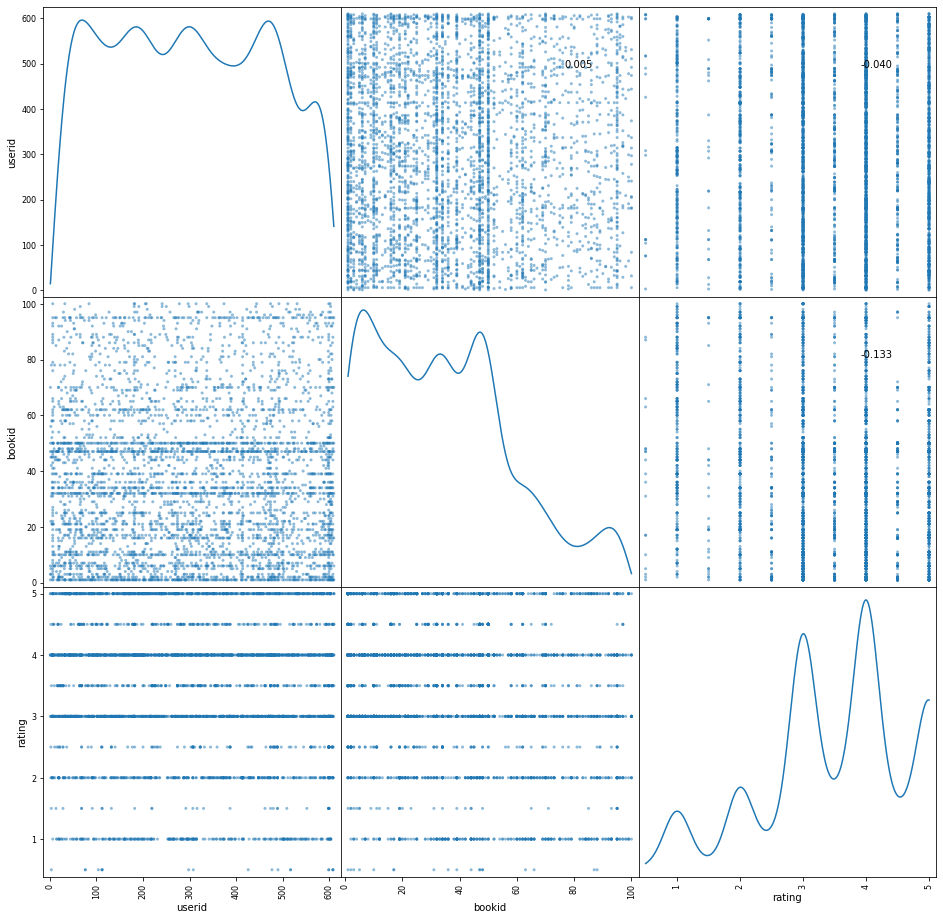

In [12]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(16, 16))
corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

          bookid    rating
bookid  1.000000 -0.133054
rating -0.133054  1.000000


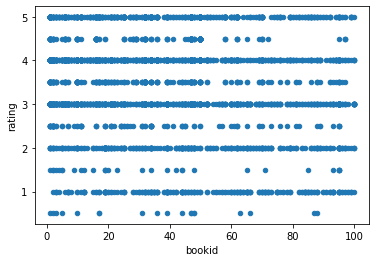

In [14]:
df.plot.scatter(x='bookid', y='rating')  #scatter plot of 2 features
print(df[['bookid','rating']].corr()) 

In [17]:
scaler = preprocessing.MinMaxScaler() # same scale
#scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MaxAbsScaler()

pcs = PCA(whiten=True) #all features
#pcs = PCA()

scores = pd.DataFrame(pcs.fit_transform(scaler.fit_transform(df.iloc[:,1:])),
                      columns=['PC{}'.format(i) for i in range(1, len(df.iloc[:,1:].columns) + 1)]) 
scores.head(10)

,PC1,PC2
0,-1.347704,0.310804
1,-1.284470,0.271093
2,-1.189619,0.211527
3,-0.265289,-1.419397
4,-0.170439,-1.478963
5,1.205827,-0.242368
6,-0.849273,1.048234
7,0.043440,-0.562834
8,0.060178,1.527544
9,-1.470452,-0.137333


In [18]:
pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance %
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

,PC1,PC2
Explained Variance,0.079371,0.057552
Explained Variance Ratio,0.579677,0.420323
Cumulative Proportion,0.579677,1.000000


Text(0.5, 1.0, 'Explained Variance by Component')

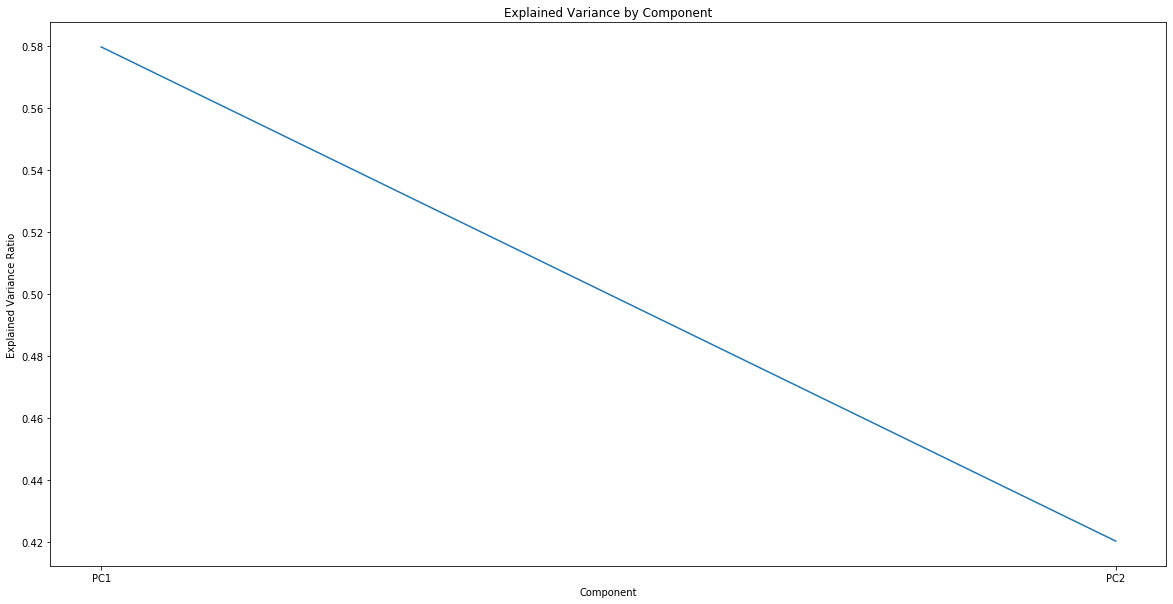

In [19]:
#scree plot
plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

In [20]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=df.iloc[:,1:].columns)
pcsComponents_df

,PC1,PC2
bookid,0.881830,-0.471567
rating,-0.471567,-0.881830


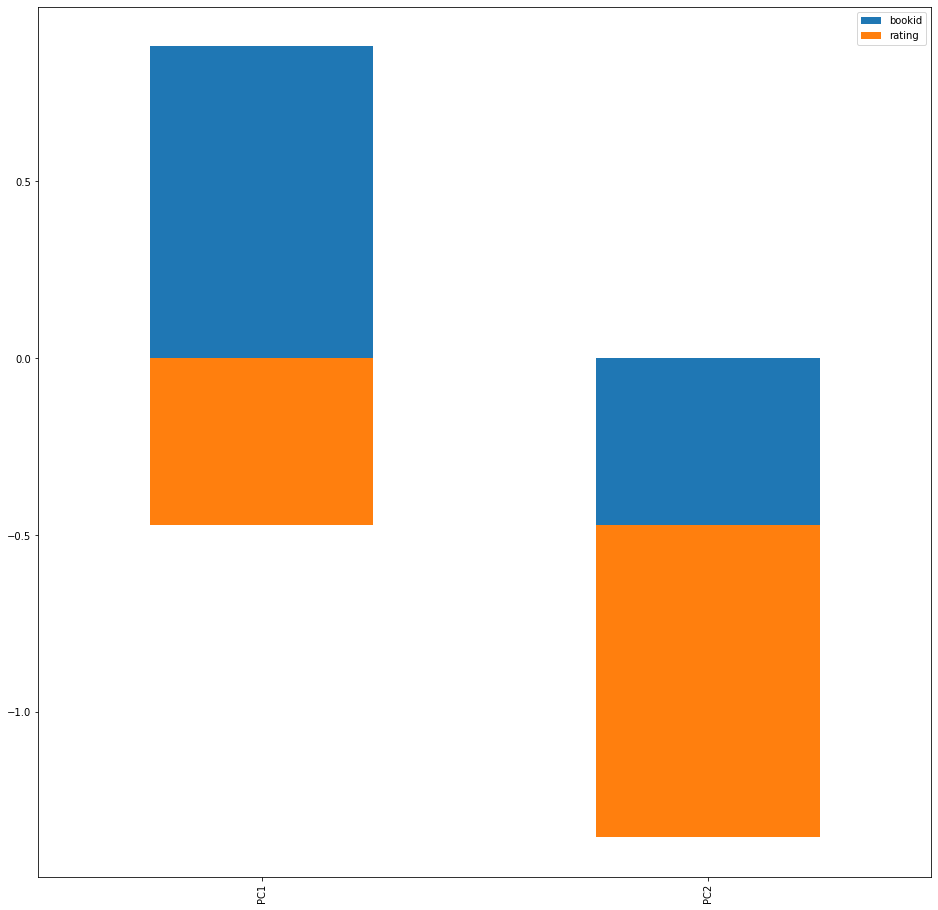

In [22]:
pcsComponents_df[['PC1','PC2']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

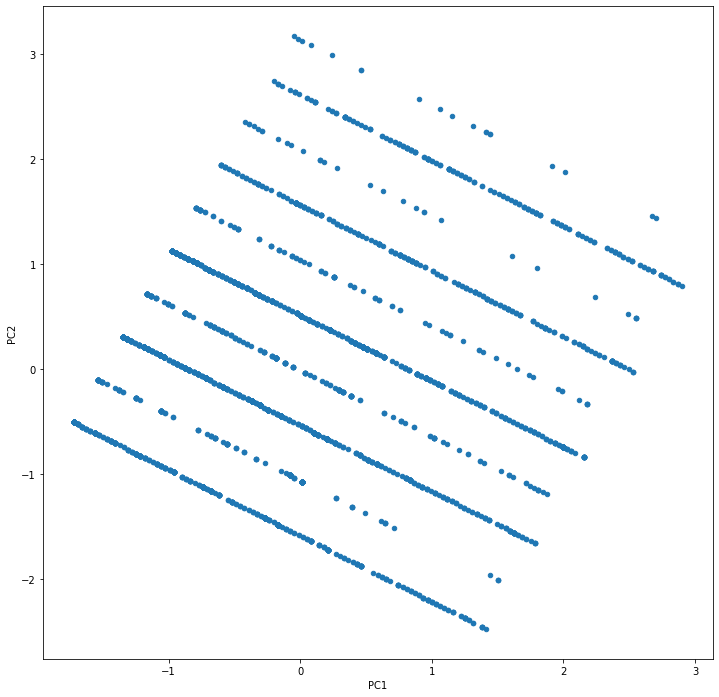

In [23]:
scores.plot.scatter(x='PC1', y='PC2',figsize=(12, 12))#plot first 2 components

In [27]:
cols=['PC1', 'PC2'] #list # of components I want to use

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,40):  #2=2 clusters, use enough to where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[cols])
    silhouette.append(silhouette_score(scores[cols],kmeans.labels_)) #silhoustte
    inertia.append(kmeans.inertia_)
    clusters.append(i)

In [28]:
kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters) #put silhouette and inertia in df
kmeans_eval  #index # clusters, silhouette_score is the score for that many clusters

,silhouette_score,inertia
2,0.349765,5274.122796
3,0.375168,3385.346174
4,0.372734,2480.107957
5,0.371114,2024.062923
6,0.397537,1639.114314
7,0.403378,1328.436966
8,0.421067,1142.895389
9,0.423178,989.800713
10,0.435467,863.773676
11,0.433626,778.205889


Text(0.5, 1.0, 'Scree Plot Inertia')

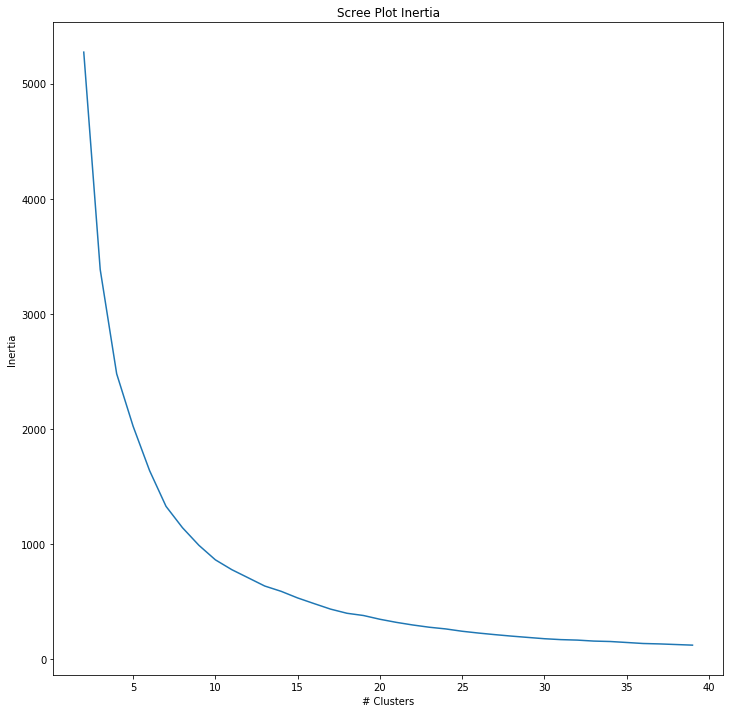

In [29]:
kmeans_eval['inertia'].plot(figsize=(12, 12))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

Text(0.5, 1.0, 'Silhouette score by # of clusters')

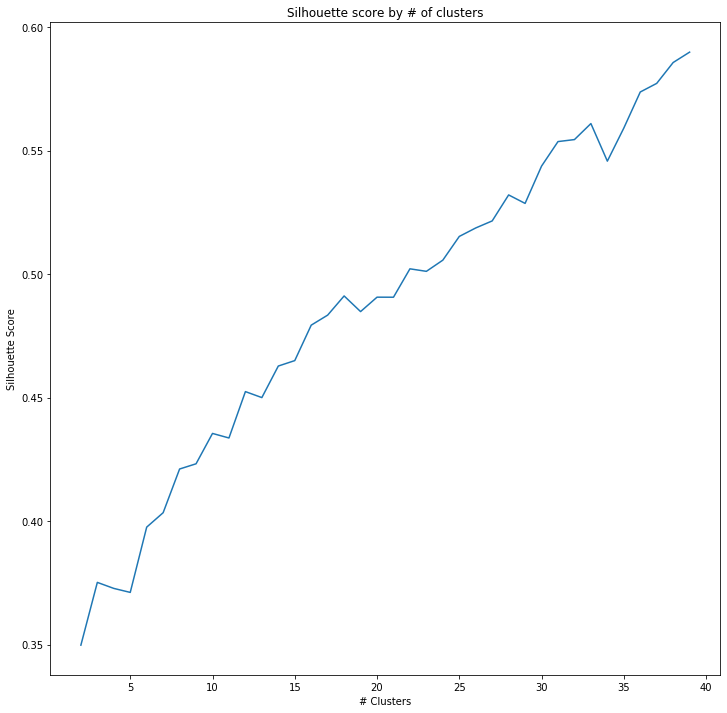

In [30]:
kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score, visually look for highest value and corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')
#print(kmeans_eval['silhouette_score'])

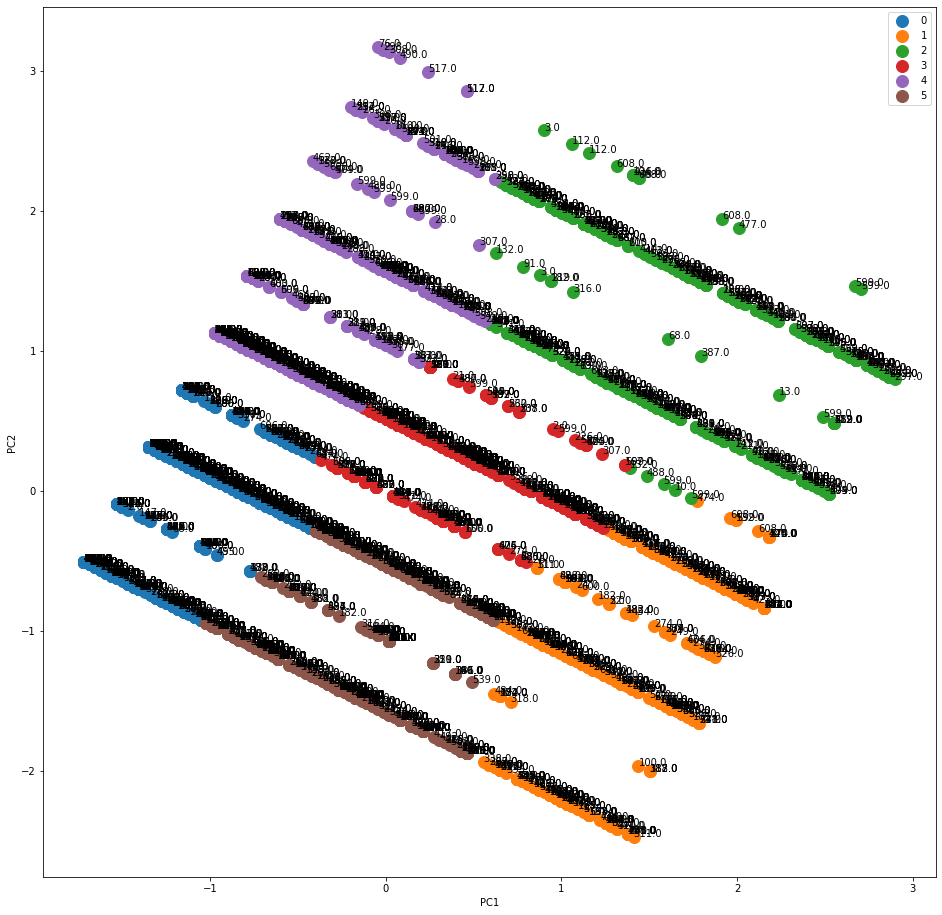

In [40]:
kmeans= KMeans(n_clusters=6).fit(scores[cols]) #kmeans number of clusters is subjective (unsupervised)
scores['cluster']=kmeans.labels_   #kmeans


groups = scores.groupby('cluster') #grouping subplots

df['cluster']=scores['cluster']  #add the cluster to primary df

ax = scores.plot.scatter(x='PC1', y='PC2', figsize=(16, 16))
points = scores[['PC1','PC2','userid']]

texts = [] #adjust text
for _, (x, y, s) in points.iterrows():#adjust text
        texts.append(ax.text(x, y, s))#adjust text
#adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))#adjust text


for name, group in groups:  #grouping subplots
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() #grouping subplots



In [41]:
y=df['rating']

In [44]:
train_X, valid_X, train_y, valid_y = train_test_split(df, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (2440, 4) Validation set: (1627, 4)
